## Regularized Method for Regression

#### Ridge Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X = 1. / (np.arange(1,11) + np.arange(0,10)[:, np.newaxis]) # Hilbert matrix of 10x10
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)


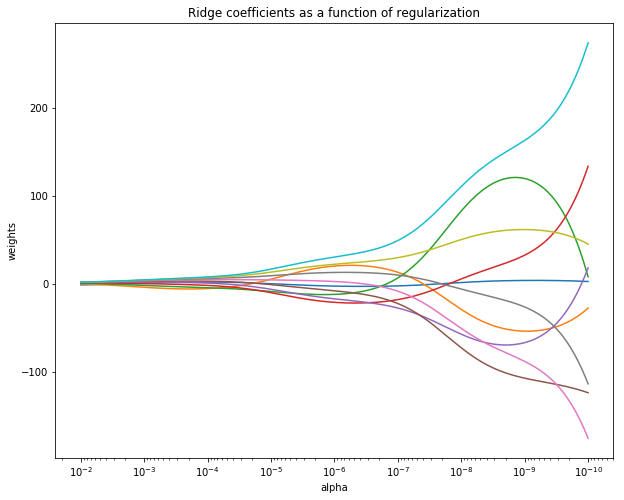

In [3]:
plt.figure(figsize=(10, 8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) #reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of regularization')
plt.axis('tight')
plt.show()

### Outliers Impact

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

In [7]:
lr = LinearRegression()
lr.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr.predict(rng.reshape(-1, 1))

Coefficient estimate [0.47134857]


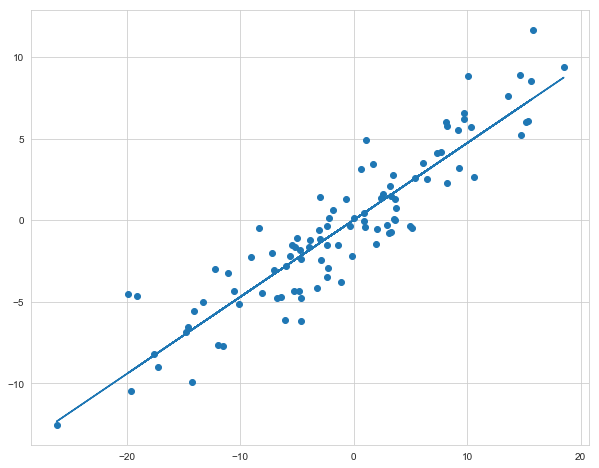

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(rng, y_gen);
plt.plot(rng, model_pred);
print("Coefficient estimate", lr.coef_)

In [70]:
idx = rng.argmax()
y_gen[idx] = -200  #large outlier

Coefficient Estimate [-0.03030297]


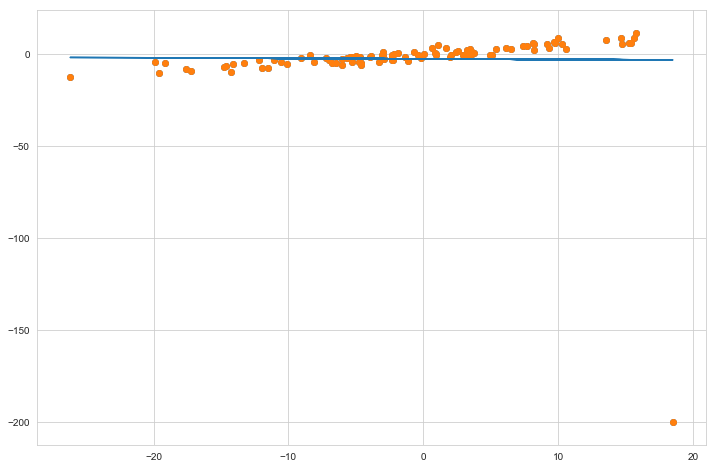

In [71]:
plt.figure(figsize=(12,8))
plt.scatter(rng, y_gen);

o_lr = LinearRegression(normalize= True)
o_lr.fit(rng.reshape(-1, 1), y_gen)
o_model_predict = o_lr.predict(rng.reshape(-1, 1))

plt.scatter(rng, y_gen);
plt.plot(rng, o_model_predict);
print('Coefficient Estimate', o_lr.coef_)

## Ridge Regression

In [14]:
from sklearn.linear_model import Ridge

Coefficient Estimate: [-0.03030297]


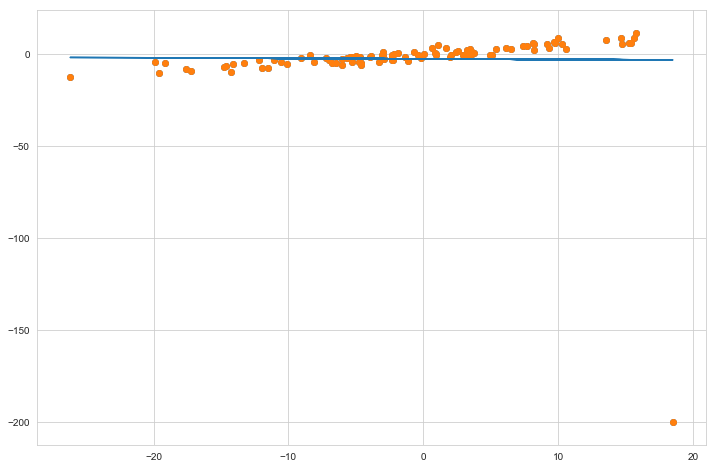

In [80]:
plt.figure(figsize=(12, 8))
plt.scatter(rng, y_gen);

ridge_mod = Ridge(alpha=0., normalize=True)
ridge_mod.fit(rng.reshape(-1, 1), y_gen)
ridge_pred = ridge_mod.predict(rng.reshape(-1, 1))

plt.scatter(rng, y_gen);
plt.plot(rng, ridge_pred);
print('Coefficient Estimate:', ridge_mod.coef_)

## LASSO Regression

In [22]:
from sklearn.linear_model import Lasso

Coefficient Estimate: [-0.]


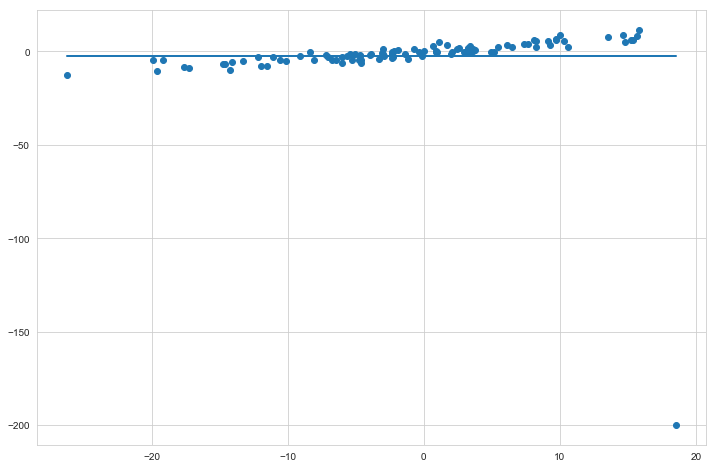

In [77]:
lasso_mod = Lasso(alpha=0.179, normalize=True)
lasso_mod.fit(rng.reshape(-1, 1), y_gen)
lasso_pred = lasso_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize=(12, 8))
plt.scatter(rng, y_gen);
plt.plot(rng, lasso_pred);
print("Coefficient Estimate:", lasso_mod.coef_)


### Elastic Net

In [28]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate: [-0.03030297]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


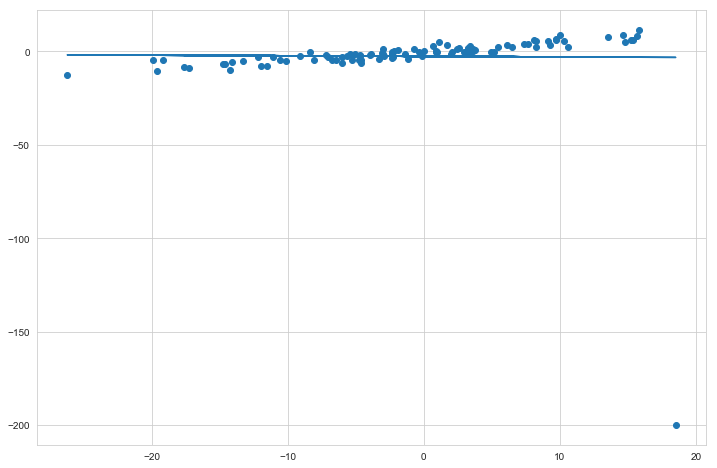

In [79]:
elasticnet_mod = ElasticNet(alpha = 0.0, normalize=True)
elasticnet_mod.fit(rng.reshape(-1, 1), y_gen)
elasticnet_pred = elasticnet_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize=(12, 8))
plt.scatter(rng, y_gen);
plt.plot(rng, elasticnet_pred);
print("Coefficient Estimate:", elasticnet_mod.coef_)